In [264]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [265]:
%store -r df

In [266]:
df.columns.tolist()

['Immoweb ID',
 'property sub-type',
 'Price',
 'Building condition',
 'Kitchen type',
 'Bedrooms',
 'Furnished',
 'Number of frontages',
 'Swimming pool',
 'Surface of the plot',
 'Living area',
 'Prop_orig',
 'Post_code_orig',
 'Property type_APARTMENT',
 'Property type_HOUSE',
 'Post code_1000',
 'Post code_1020',
 'Post code_1030',
 'Post code_1040',
 'Post code_1050',
 'Post code_1060',
 'Post code_1070',
 'Post code_1080',
 'Post code_1081',
 'Post code_1082',
 'Post code_1083',
 'Post code_1090',
 'Post code_1120',
 'Post code_1130',
 'Post code_1140',
 'Post code_1150',
 'Post code_1160',
 'Post code_1170',
 'Post code_1180',
 'Post code_1190',
 'Post code_1200',
 'Post code_1210',
 'Post code_1300',
 'Post code_1301',
 'Post code_1310',
 'Post code_1315',
 'Post code_1320',
 'Post code_1325',
 'Post code_1330',
 'Post code_1331',
 'Post code_1332',
 'Post code_1340',
 'Post code_1341',
 'Post code_1342',
 'Post code_1348',
 'Post code_1350',
 'Post code_1357',
 'Post code_1360

In [267]:
len(df.index)

12211

# Correlation before

In [268]:
# display all df row
pd.options.display.max_rows = 999

### Correlation between price and variables

In [269]:
# df_excluded = df.loc[:, ~df.columns.isin(['price/m2'])]

df_excluded_post_code = df.loc[:,~df.columns.str.startswith('Post code_')]
df_excluded = df_excluded_post_code.loc[:, ~df_excluded_post_code.columns.isin(['price/m2'])]

corr = df_excluded.corr()["Price"]
corr[np.argsort(corr, axis=0)[::-1]]

Price                      1.000000
Living area                0.451236
Surface of the plot        0.357749
Bedrooms                   0.327389
Property type_HOUSE        0.283683
Number of frontages        0.202133
Building condition         0.147350
Kitchen type               0.137699
Terrace_Combined           0.107680
garden_label               0.081931
Swimming pool             -0.013529
Immoweb ID                -0.034834
Furnished                 -0.038973
Post_code_orig            -0.103292
Property type_APARTMENT   -0.283683
Name: Price, dtype: float64

### make a graph

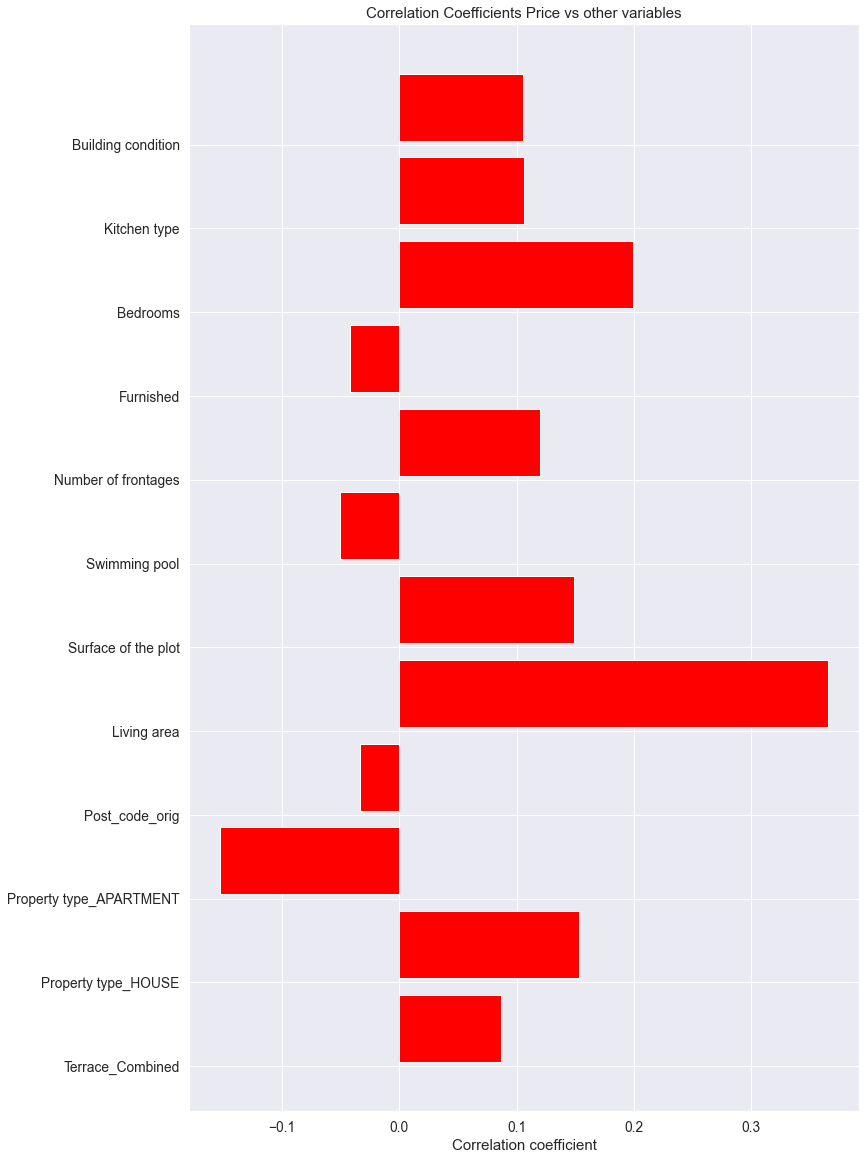

In [283]:
#plotting correlations
num_feat=df_excluded.columns[df_excluded.dtypes!=object]
num_feat=num_feat[1:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(df_excluded[col].values, df_excluded.Price.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12, 20))
rects = ax.barh(ind, np.array(values), color='red')



ax.set_yticks(ind + ((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients Price vs other variables");

plt.gca().invert_yaxis()

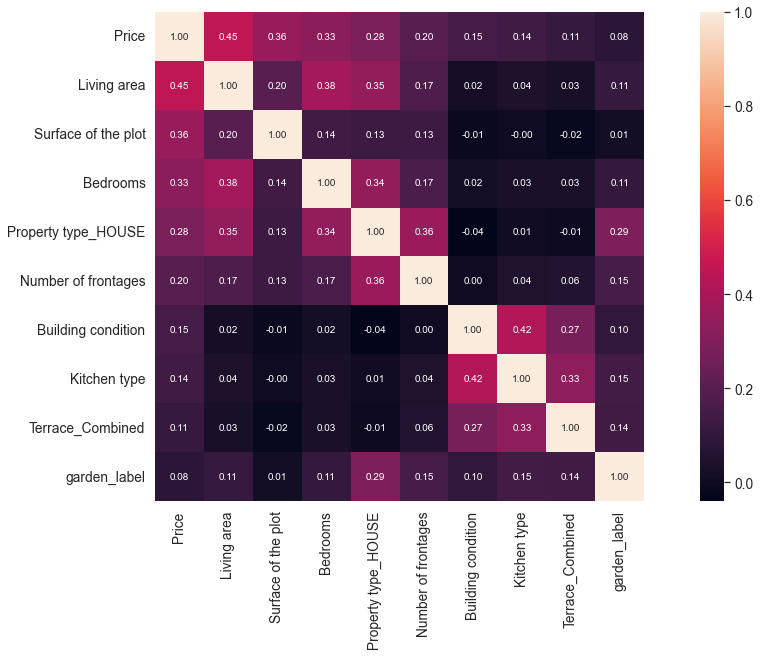

In [271]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize=(20, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Correlation between variables

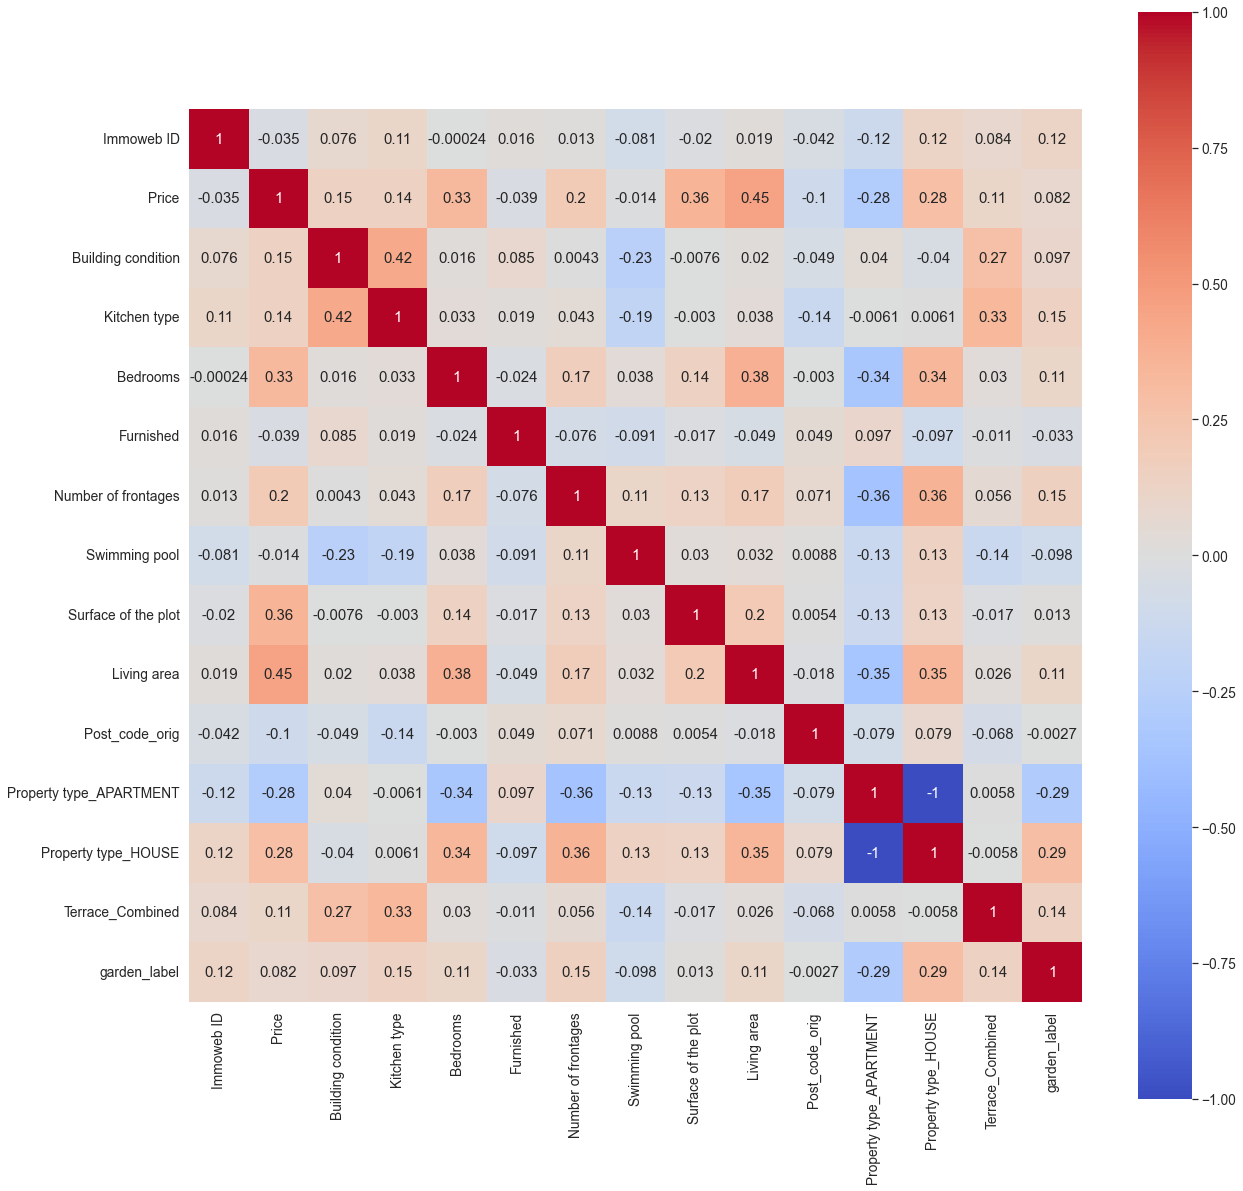

In [272]:
#correlation matrix
corrmat = df_excluded.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=1, square=True, annot=True, cmap="coolwarm");

# Correlation After

## Bedrooms

<AxesSubplot:xlabel='Bedrooms'>

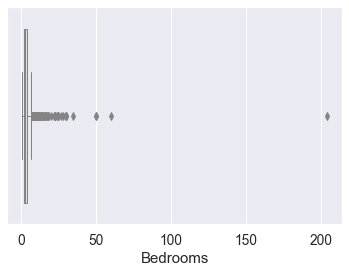

In [273]:
sns.boxplot(x="Bedrooms", data=df, width=0.8, linewidth=1, palette='coolwarm')

In [274]:
test = df
test = df[df["Bedrooms"] <= 20]
test['Bedrooms']

0        1
1        1
2        1
3        3
4        2
        ..
14534    1
14535    1
14536    1
14537    1
14538    2
Name: Bedrooms, Length: 12192, dtype: int64

<AxesSubplot:xlabel='Bedrooms'>

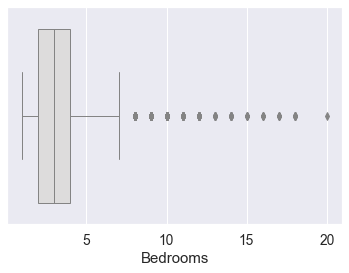

In [275]:
sns.boxplot(x="Bedrooms", data=test, width=0.8, linewidth=1, palette='coolwarm')

In [276]:
test['Bedrooms'].describe()

count    12192.000000
mean         3.043717
std          1.782020
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         20.000000
Name: Bedrooms, dtype: float64

## Living area

<AxesSubplot:xlabel='Living area'>

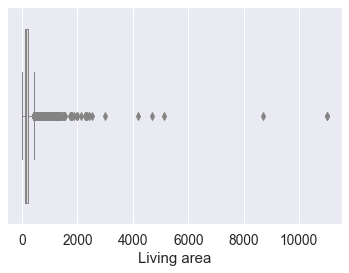

In [277]:
sns.boxplot(x="Living area", data=test, width=0.8, linewidth=1, palette='coolwarm')

In [278]:
test['Living area'].describe()

count    12192.000000
mean       199.703330
std        255.222244
min         12.000000
25%         95.000000
50%        150.000000
75%        229.250000
max      11000.000000
Name: Living area, dtype: float64

In [279]:
# remove Living area based on 75% of data -> 229.250000
test = df[df["Living area"] <= 229.250000]
test['Living area']

0         63.0
1         42.0
2         42.0
3        150.0
4        120.0
         ...  
14534     95.0
14535     95.0
14536     95.0
14537     95.0
14538     95.0
Name: Living area, Length: 9149, dtype: float64

In [280]:
test['Living area'].describe()

count    9149.000000
mean      119.675812
std        48.240652
min        12.000000
25%        94.000000
50%       114.000000
75%       150.000000
max       229.000000
Name: Living area, dtype: float64

# Result correlation after

In [281]:
df_excluded_post_code = test.loc[:,~test.columns.str.startswith('Post code_')]
df_excluded = df_excluded_post_code.loc[:, ~df_excluded_post_code.columns.isin(['price/m2', 'Property type_HOUSE', 'Property type_APARTMENT'])]

corr = df_excluded.corr()["Price"]
corr[np.argsort(corr, axis=0)[::-1]]

Price                  1.000000
Living area            0.365943
Bedrooms               0.199094
Surface of the plot    0.149113
Number of frontages    0.120009
Kitchen type           0.106752
Building condition     0.105388
Terrace_Combined       0.086939
garden_label           0.035485
Immoweb ID            -0.000718
Post_code_orig        -0.033584
Furnished             -0.042271
Swimming pool         -0.050706
Name: Price, dtype: float64

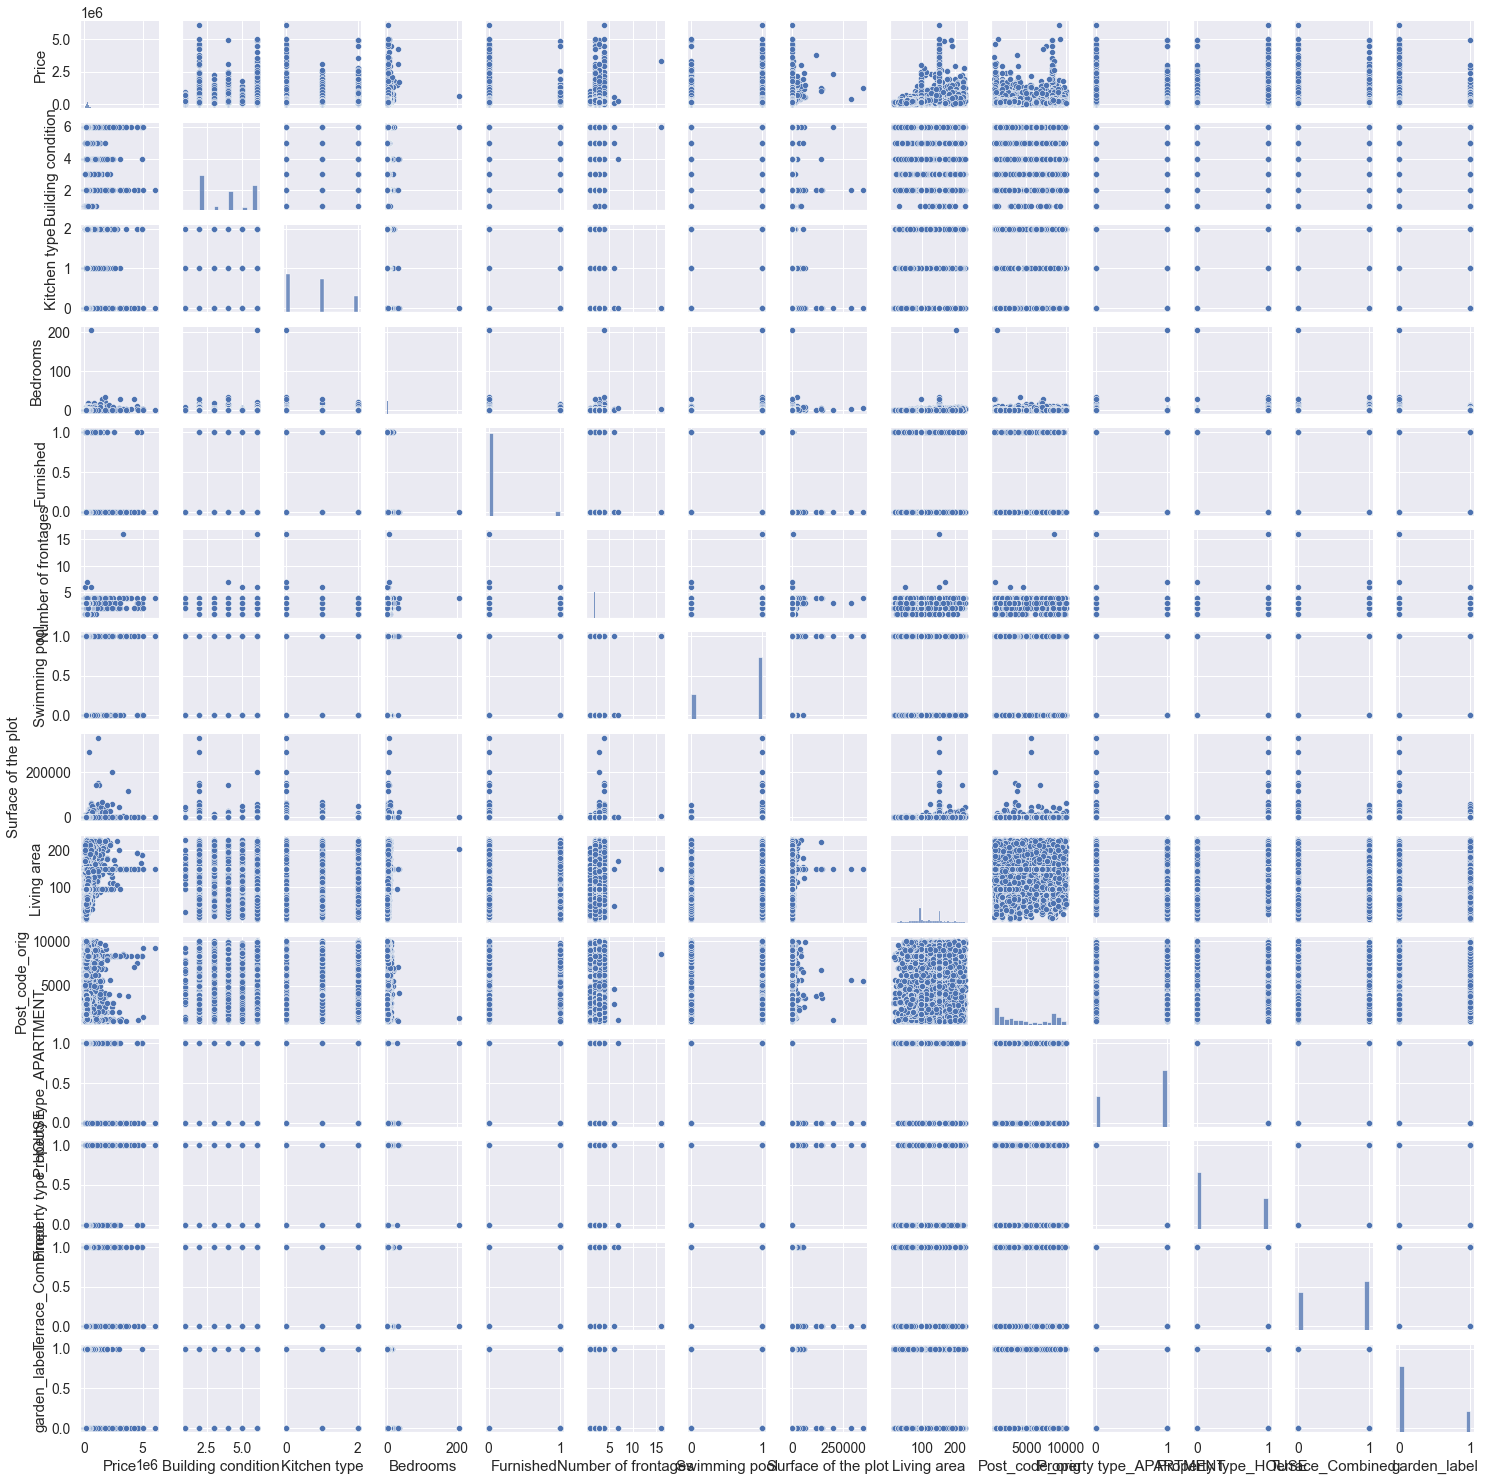

In [282]:
df_excluded = df_excluded_post_code.loc[:, ~df_excluded_post_code.columns.isin(['price/m2', 'Immoweb ID'])]

sns.pairplot(df_excluded, height=1.5)